## 15.2 Data used in our examples

We will use a dataset that is simulated to represent data from electronic health records for 200,000 patients. The outcome we will consider is whether or not a patient is diagnosed with dementia. In this example, there is an additional complexity because patients were followed up for different amounts of time. A longer follow-up will naturally lead to a higher probability of being diagnosed with dementia. In later modules, we will encounter survival analysis which allows the aspect of time to be accounted for. For now, we will ignore this aspect. 

The code below reads in the dataset and displays the first few rows. 

In [1]:
# we load the dataset and display its first lines
dementia <- read.csv("Practicals/Datasets/Dementia/dementia2.csv")
head(dementia)

,id,prac,pr_lcd,sex,age,bmi,bmi_category,consultations,agegp,alcohol,⋯,mortality,date_death,timetodementia,dementia,date_dementia,end_date,dob,rsample,vitd,lp
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,⋯,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,23189,142,08dec2009,1,53,20.4,Normal (18.5-<25),12,50,3-6 units/day,⋯,0,,NA,0,,08dec2009,01nov1941,1,NA,-0.8153054
2,92186,132,03feb2003,0,73,21.5,Normal (18.5-<25),4,70,<2 units/day,⋯,0,,NA,0,,03feb2003,16jan1928,1,NA,-1.2268275
3,187963,43,06jul2001,0,40,27.1,Overweight (25-<30),0,40,<2 units/day,⋯,0,,NA,0,,06jul2001,18jun1961,1,NA,-0.6602434
4,148379,215,08mar2012,1,40,20.9,Normal (18.5-<25),3,40,<2 units/day,⋯,0,,NA,0,,08mar2012,10feb1952,1,23.22692,-0.9507329
5,44194,225,02feb2011,1,92,32.5,Obese class I (30-<35),10,90,Non drinker,⋯,0,,NA,0,,02feb2011,09dec1912,1,NA,1.0403746
6,169915,175,02nov2011,1,55,26.3,Overweight (25-<30),3,55,3-6 units/day,⋯,0,,NA,0,,02nov2011,06oct1946,1,NA,-0.1080445


## 15.2.1 Exploratory analyses

The variables we will use during this session are:

* id: a variable that identifies a patient
* sex: a factor variable that gives the sex of the patient ($0$ for men, $1$ for women)
* age: age in years of the patient at study baseline
* bmi: Body Mass Index of the patient at study baseline
* dementia: an indicator variable that equals $1$ if the patient is diagnosed with dementia during follow-up, $0$ if not.

In this session the outcome of interest is dementia diagnosis, which we will treat as a binary variable. We are interested in modelling the relationship between dementia diagnosis and age, sex and BMI. Generally, we would expect older people to have a higher risk of being diagnosed with dementia. Females typically have higher risk. The relationship with BMI is less well understood.

The code below tabulates dementia and sex and draws box-plots of age and BMI, separately by dementia diagnosis status.

   
         0      1
  0 107981   1707
  1  88132   2180

   
             0          1
  0 0.98443768 0.01556232
  1 0.97586146 0.02413854

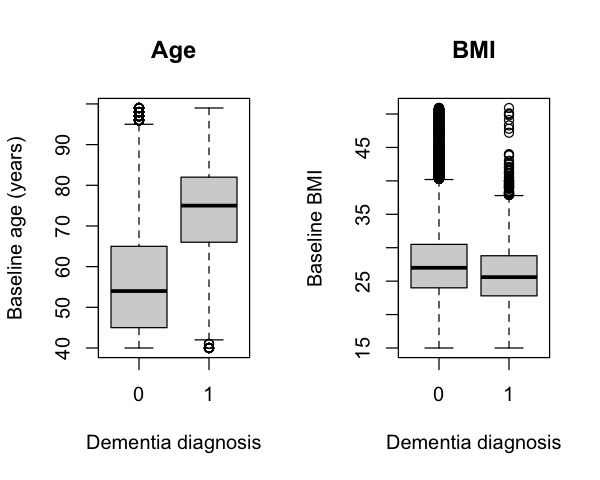

In [2]:
# Tabulate dementia diagnosis versus sex (dementia = right-hand column)
(table<-table(dementia$sex, dementia$dementia))
prop.table(table, 1)

# Box plot of age by dementia diagnosis
par(mfrow=c(1,2))
options(repr.plot.height=4, repr.plot.width=5)
boxplot(dementia$age ~ dementia$dementia, main="Age", xlab="Dementia diagnosis", ylab="Baseline age (years)")
boxplot(dementia$bmi ~ dementia$dementia, main="BMI", xlab="Dementia diagnosis", ylab="Baseline BMI")


From the output above, we see that dementia is fairly rare in this study population, with 1.6% of males receiving a dementia diagnosis during follow-up compared to a slightly higher 2.4% among females. 

The box-plots show that patients who received a dementia diagnosis during follow-up generally had a much higher age at baseline, as expected. The second box-plot perhaps hints at a slightly lower BMI among those diagnosed with dementia, but there is a less evident relationship than for age. 